In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import plotly.express as px
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [32]:
df=pd.read_csv('training303.csv')

In [33]:
corr_matrix = df.corr()

In [34]:
train=df.drop('target',axis=1)
target=df['target']

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

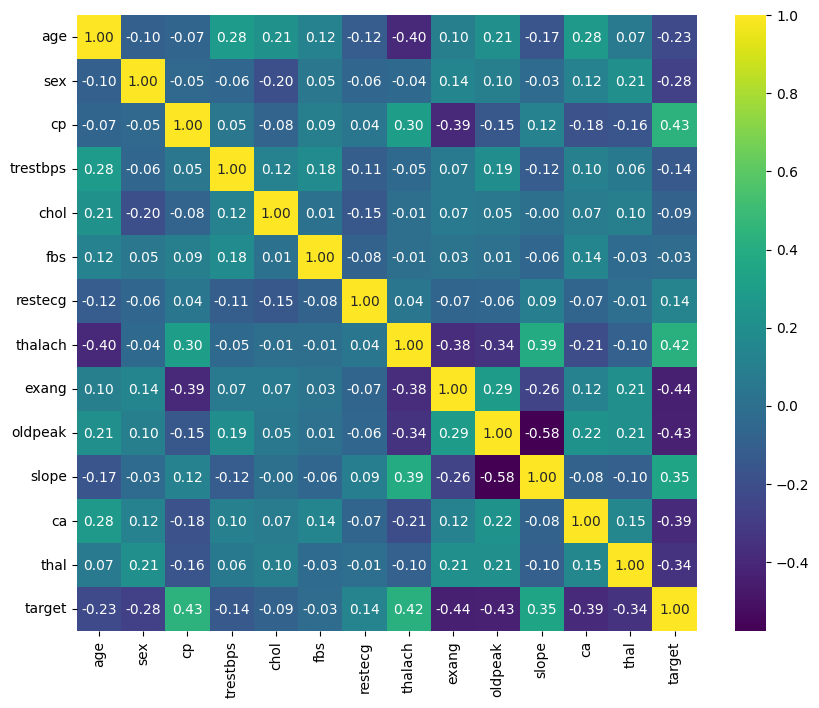

In [36]:
plt.figure(figsize=(10, 8))
fig=sns.heatmap(corr_matrix,cmap='viridis',annot=True,fmt='.2f')

Now we can see each variable correlation 


We load our testing dataset

In [37]:

test=pd.read_csv('testing_121.csv')
real=test['target']

We shall find the proper max depth using a for loop,we want the data to not
 be overfitted

In [38]:
feat1=['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']#positive and negative corr
feat2=['cp', 'thalach', 'slope']# positive corr
feat3=['sex', 'exang', 'oldpeak', 'ca', 'thal']# negative corr
feat4=['cp', 'thalach', 'exang', 'oldpeak', 'ca']#strong corr
feat5=['sex', 'slope', 'thal' ]#weak corr
features=[feat1,feat2,feat3,feat4,feat5]

In [39]:
acc=[]
num=[]
for  f in features:
    for i in  range(15):
        dt=  DecisionTreeClassifier(max_depth=i+1, criterion='gini', random_state=42,splitter='random')
        dt.fit(train[f],target)
        prediction=dt.predict(test[f])
        acc.append(accuracy_score(real,prediction))
        num.append(i)
px.scatter(x=acc,y=num)

y=9 will be used

In [40]:
dt1=  DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42,splitter='random')
dt2=  DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42,splitter='random')
dt3=  DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42,splitter='random')
dt4=  DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42,splitter='random')
dt5=  DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=42,splitter='random')

In [41]:
dt1.fit(train[feat1],target)
dt2.fit(train[feat2],target)
dt3.fit(train[feat3],target)
dt4.fit(train[feat4],target)
dt5.fit(train[feat5],target)

DecisionTreeClassifier(max_depth=9, random_state=42, splitter='random')

In [42]:
prediction1=dt1.predict(test[feat1])
prediction2=dt2.predict(test[feat2])
prediction3=dt3.predict(test[feat3])
prediction4=dt4.predict(test[feat4])
prediction5=dt5.predict(test[feat5])
prediction=[prediction1,prediction2,prediction3,prediction4,prediction5]

In [43]:
for feature_name, pred in zip(features, prediction):
    print("Feature:", feature_name)
    print('Accuracy:', accuracy_score(real, pred))
    print('Precision:', precision_score(real, pred))
    print('Confusion Matrix:\n', confusion_matrix(real, pred))
    print()



Feature: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Accuracy: 0.9416666666666667
Precision: 0.9076923076923077
Confusion Matrix:
 [[54  6]
 [ 1 59]]

Feature: ['cp', 'thalach', 'slope']
Accuracy: 0.8333333333333334
Precision: 0.8571428571428571
Confusion Matrix:
 [[52  8]
 [12 48]]

Feature: ['sex', 'exang', 'oldpeak', 'ca', 'thal']
Accuracy: 0.9
Precision: 0.8870967741935484
Confusion Matrix:
 [[53  7]
 [ 5 55]]

Feature: ['cp', 'thalach', 'exang', 'oldpeak', 'ca']
Accuracy: 0.95
Precision: 0.921875
Confusion Matrix:
 [[55  5]
 [ 1 59]]

Feature: ['sex', 'slope', 'thal']
Accuracy: 0.7666666666666667
Precision: 0.7857142857142857
Confusion Matrix:
 [[48 12]
 [16 44]]

